<ipython-input-1-937acb7474e2>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing values


Accuracy: 0.75


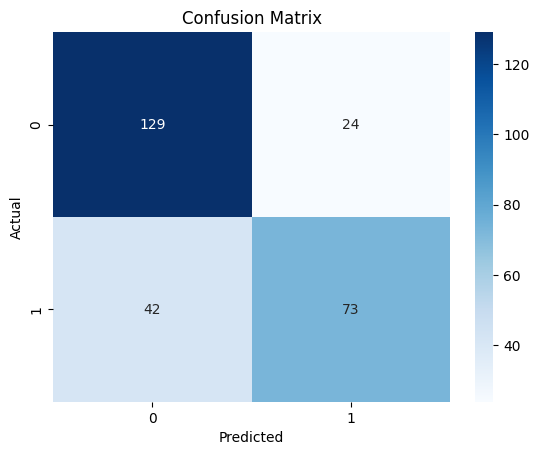

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       153
           1       0.75      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocess the data
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode gender
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing values

# Split the data into features and target
X = df.drop(columns='Survived')
y = df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the SVC model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd

# Define the URL for the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Load the dataset
df = pd.read_csv(url)

# Save the dataset as a CSV file
df.to_csv('titanic.csv', index=False)

print("Titanic dataset has been saved as 'titanic.csv'.")


Titanic dataset has been saved as 'titanic.csv'.


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True)

In [6]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64


In [8]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [11]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [33]:
y_pred=svc.predict(X_test)

In [42]:
y_pred1=knn.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,y_pred)*100)
print(accuracy_score(y_test,y_pred1)*100)

80.59701492537313
76.66666666666667
69.0
72.63157894736842
79.8507462686567


In [45]:
import pickle
pickle.dump(knn,open('model_tit.sav','wb'))
pickle.dump(scaler,open('scaler_tit.sav','wb'))